# 선형회귀 with 파이썬

## 오차?

우리가 얻을 수 있는 데이터는 참값이 아니라 항상 오차가 포함되어 있다. 아무리 정밀한 실험을 해도, 아무리 장비를 잘 만들어도 측정오차가 있을 수 밖에 없다. 이러한 오차를 줄이려면 같은 실험을 많이 반복해서 평균을 구하면 된다. 이런 오차는 어느 한쪽으로 치우지지 않기 때문에 (unbiased) 오차의 기댓값은 0일 것이다.

1. 중심극한정리에 의해, 확률변수 $X$에 대하여 $\mathbb{E}[X]=\mu, \mathbb{Var}[X]=\sigma^2$이라고 하면 $n\rightarrow\infty$일 때, $n$회 독립시행의 샘플 평균 $\bar{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$은 실제 확률 분포와 상관 없이 기댓값 $\mu$와 분산 $\frac{\sigma^2}{\sqrt{n}}$ 을 가지는 가우시안 분포에 가까워진다. 

2. 큰 수의 법칙 (Law of Large Numbers)에 의해 아주 큰 $n$에 대해서 다음이 성립하는 $\epsilon>0, \delta>0$이 존재한다.
$$Pr\left[\left\lvert{\frac{1}{n}\sum_{i=1}^{n}X_i - \mathbb{E}[X]}\right\rvert<\epsilon\right]>1-\delta$$

1.,2.에 의해 독립시행을 무한히 반복하면 오차가 클 확률은 0으로 수렴함을 알 수 있다.

## 회귀?
하지만 우리는 '동일한'조건에서 실험을 '무한히'할 수 없다. 돈과 시간의 문제 뿐만 아니라 실험 조건도 변하기 때문이다. 오차를 유도하는 변수가 너무 많이서 이를 전부 고정시키기란 불가능하다. 또한, 애초에 참값이 없는 경우도 있다. 예를 들어, 설문조사를 생각해보자. 사람들의 생각은 전부 다르고, 정답이 없기 때문에 많은 사람들을 설문하여 평균을 구해도 그 값은 기댓값일 뿐, 참값이 아니다. 이런 경우 우리가 얻고 싶은 것은 "경향성"인데, 이것을 어떻게 구할 수 있을까?

예시를 살펴보자. 다음은 분꽃의 종류에 따른 꽃잎의 길이와 너비를 비교한 것이다.

Text(0.5, 1.0, 'Iris plants dataset')

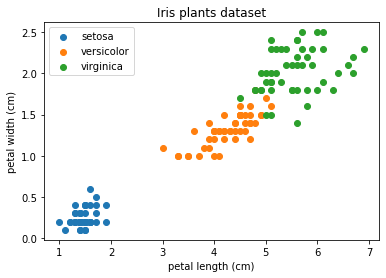

In [92]:
from sklearn.datasets import load_iris
iris = load_iris() # 이것은 유명한 예시 데이터라서 인터페이스가 잘 되었지만 대부분의 데이터는 .csv 형태의 파일로 제공된다는 점에 유의하자.
x = iris.data[:, 2:4]
y = iris.target
plt.scatter(x[y==0][:,0], x[y==0][:, 1], label=iris.target_names[0])
plt.scatter(x[y==1][:,0], x[y==1][:, 1], label=iris.target_names[1])
plt.scatter(x[y==2][:,0], x[y==2][:, 1], label=iris.target_names[2])
plt.legend()
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title(iris.DESCR.split('\n')[2])

직관적으로, 대체로 꽃잎이 길수록 너비도 길다는 것을 알 수 있다. 하지만 '직관적으로' 라는 말로는 꽃잎의 너비와 길이가 얼마나 연관되어 있는지 수치화하기 어렵다. 이런 경향성을 정확히 표현하기 위해 회귀(regression)를 사용한다.